# Task 2

#### Compare the run times of your Rcpp version of the "fundamental algorithm" with the runtimes of the Python implementation you created for the assessment in STOR-601 "Introductory Python".

### A) Python implementation

In [5]:
import numpy as np
import math
from itertools import combinations
import random
import string
import pandas as pd
import time


In [6]:
ex_male ={'A':['c', 'b', 'd', 'a'], 'B':['b', 'a', 'c', 'd'], 
                        'C':['b', 'd', 'a', 'c'], 'D':['c', 'a', 'd', 'b']}
ex_female = pd.DataFrame({'1st':['A', 'C', 'C', 'B'], '2nd':['B', 'A', 'B', 'A'], 
                        '3rd':['D', 'D', 'D', 'C'], '4th':['C', 'B', 'A', 'D'], 'Omega':['Om', 'Om', 'Om', 'Om'], 'ID':['a', 'b', 'c', 'd'] })

ex_female = ex_female.set_index('ID')
display(ex_male, ex_female)

{'A': ['c', 'b', 'd', 'a'],
 'B': ['b', 'a', 'c', 'd'],
 'C': ['b', 'd', 'a', 'c'],
 'D': ['c', 'a', 'd', 'b']}

,1st,2nd,3rd,4th,Omega
ID,,,,,
a,A,B,D,C,Om
b,C,A,D,B,Om
c,C,B,D,A,Om
d,B,A,C,D,Om


In [7]:
def finding_stable_matching(ex_male, ex_female):
    list_male = list(ex_male.keys())
    k=0                         # initialising the number of couples formed
    n=len(list_male)            # number of men = number of women
    omega = 'Om'                 # the very undesirable men
    matching = [(omega, 'a'), (omega, 'b'), (omega, 'c'), (omega, 'd')]
    while (k<n):
        X = list_male[k]        # the current suitor
        while (X!=omega):       
            x = ex_male[X][0]     # prefered choice on current male's list   
            x_couple = [element for element in matching if element[1] == x] # couple of current male's prefered choice
            x_fiance =  x_couple[0][0]                                      # male with whom current male's prefered choice is coupled currently
            list_of_x_choice = ex_female.iloc[ex_female.index.get_loc(x)].tolist()  # obtain a list of preference for current male's preferred choice
            current_male_position_in_x = list_of_x_choice.index(X)
            current_partner_position_in_x = list_of_x_choice.index(x_fiance)
            if (current_male_position_in_x < current_partner_position_in_x):
                x_couple_list = list(x_couple[0])
                x_couple_list[0] = X
                x_couple = tuple(x_couple_list)
                matching = [x_couple if e[1] == x_couple[1] else e for e in matching]
                X = x_fiance

            if (X!=omega):
                ex_male[X].remove(x)
        k = k+1

    return(matching)

In [9]:
start = time.perf_counter()
finding_stable_matching(ex_male, ex_female)
end = time.perf_counter() 
display("Running time (seconds)",end-start)

'Running time (seconds)'

0.0009322380647063255

### B) Rcpp implementation

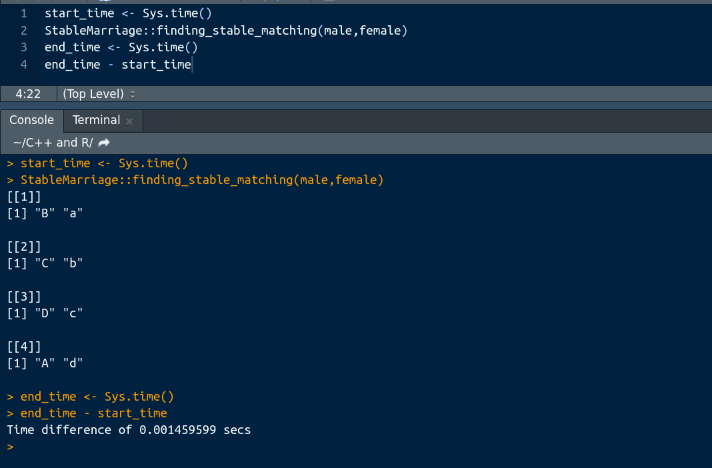

### C) Comparing running times

The Rcpp implementation of the stable marriage problem was 1.5 times slower than the Python version. However, this was only run for a preferance table of size 4. This is a major limitation and we cannot make any conclusion about the speed of both algorithms. Many results in the literature comparing both implementations conclude that Rcpp is faster. An explanation of Rcpp running slower might be that there exist a fix cost associated with the communication of C++ and R. Therefore, on small scale examples this fix cost represente the majority of the total cost, explaining why Rcpp is slower. Hence, Rcpp is expected to run faster for larger preference tables. Additionally, the difference in computing time is also expected to increase as the size of the table increases.

# Task 3

#### For each of the 5Rs discussed in Benureau and Rougier, score on a scale of 0 to 5:

## A) Python implementation of the "fundamental algorithm" from STOR-601 "Introductory Python"

### Re-runnable (R1) : 4/5
To the best of my belief, re-runnability is well respected. The only reason why 1 point was deducted was due to python functions and packages versions were not indicated.

### Repeatable (R2) : 5/5

The code ensured that when it is re-run it produces the same results. This can be achieved by setting seeds, which needs to be done after testing a couple different seeds to ensure the one chosen isn't producing results that are very rare cases of what we want to produce. This was done throughout this project, where appropriate.

Additionally, produced data can be saved in a file and checked to ensure we obtain the same data after repeating the project. However, this was not necessary here.


### Reproducible (R3) : 3/5
The underlying issue here is that the sequence of numbers produced by setting seeds might change from version to version. Therefore, we risk obtaining different results even if we are using the same code, with the same seeds. This issue is also true for functions, used in the code. Therefore, there should be some indication as to what version of python was used, what version of packages etc... One way to deal with the seed issue is to save the sequence used from the settled seed and then the next person using our code can check if the seed is producing the same sequence of numbers. We can check ourselves for this using Unit testing. More could have been done in this code to reflect these principles of reproducibility.

### Reusable (R4) : 4.567282/5
This focuses on making our code easy to use for ourselves in the future and other people. Annotations about the decisions that were made while writing this code gives an insight as to what I was thinking while writing it. This helps understanding the code and explain why certain decisions were made. Making it much easier for anyone to use my code. Another aspect of reusability is about sharing my code. Uploading it to GitHub for example enables other people to access it easily and might even have the additional benefit of someone spotting a mistake in my work. Finally, another easy way to make our code reusable is by avoiding "magic numbers", this was applied throughout this project.

### Replicable (R5) : 4.2/5

This is more about the article or description that supports the code and project. The idea is that we want to ensure that what we are doing is very clear. All the little details that might seem too much, might actually ensure that if someone reads the description alone, they can write their own code and produce the same results. Descriptions are provided within my code, however, no supporting documentation was written. This can be seen as overkill for such a simple project and therefore only 0.8 of a point was deducted.


##  B) C++ implementation of the "fundamental algorithm" from STOR-601 "C++ for Python Programmers"

### Re-runnable (R1) : 5/5
C++ minimises the use of functions, by requiring either to define them within the code or by not using any. This makes this code fully re-runnable given the correct version of c++.

### Repeatable (R2) : 5/5 
The code doesn't leave any space for potentially obtaining different results. The variable types, function types, inputs, outputs, etc... are all predefined. Making sure the results are repeatable.

### Reproducible (R3) : 4/5 
Running the code using a different version of c++ (not c++17) is potentially the only issue here. 

### Reusable (R4) : 5/5
C++ requires to define everything very explicitly. This ensures no grey areas of potential misinterpretation for someone reading the code.

### Replicable (R5) : 4.2/5
The logic is the same as for the replicability of the Python code. However, c++ code isn't as easy to read/understand.

## C) R package implementation of the "fundamental algorithm" from Task 1 of this assessment

### Re-runnable (R1) : 5/5
C++ minimises the use of functions, by requiring either to define them within the code or by not using any. This makes this code fully re-runnable given the correct version of c++. Additionally, the R package can be updated and users can download the new version from Github.

### Repeatable (R2) : 5/5
The code doesn't leave any space for potentially obtaining different results. The variable types, function types, inputs, outputs, etc... are all predefined. Making sure the results are repeatable.

### Reproducible (R3) : 4/5 
Running the code using a different version of c++ (not c++17) is potentially the only issue here. 

### Reusable (R4) : 5/5
C++ requires to define everything very explicitly. This ensures no grey areas of potential misinterpretation for someone reading the code.

### Replicable (R5) : 4/5
The logic is the same as for th replicability of the Python code. However, c++ code isn't as easy to read/understand. Additionally, there is the difficulty of understanding the interface of R and c++. 